In [11]:
import sys, os
import yaml
from hypnotoad import tokamak
from hypnotoad.core.mesh import BoutMesh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from soledge.wrapper_class import *
from xbout import open_boutdataset
from hermes3.grid_fields import *
import h5py

# %matplotlib qt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%matplotlib inline

# Note
- This one tries to get the right extent on OMP

In [13]:
slc = SOLEDGEcase(os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19"))

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


In [15]:
%matplotlib inline

1.3608689218969869e+17 5.846388330524162e+19


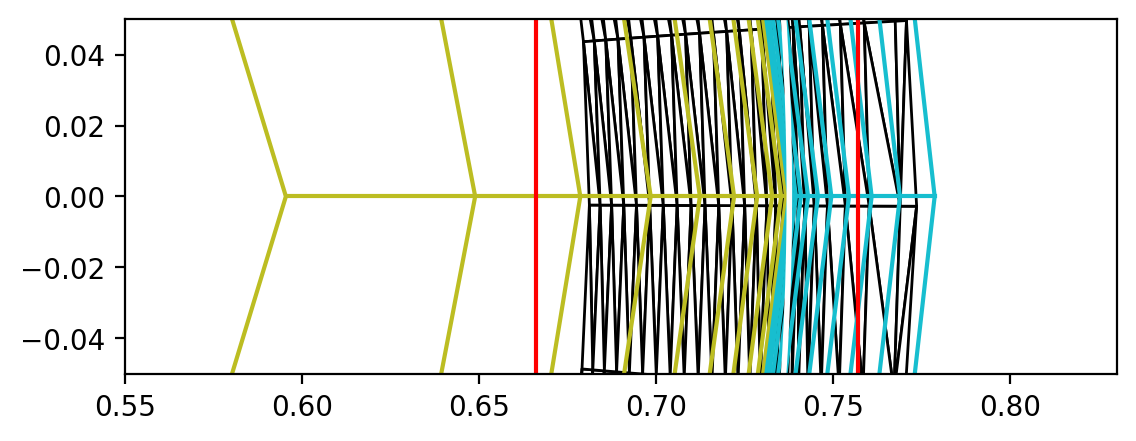

In [53]:
fig, ax = plt.subplots(dpi = 200)
mesh.plotGridCellEdges(ax = ax)
# eq.plotPotential(ncontours = 200, axis = ax, linewidths = 0.5)
# ax.set_xlim([0.15, 0.65]); ax.set_ylim([-0.86,-0.2])     # Both lower divertors
ax.set_xlim([0.55, 0.83]); ax.set_ylim([-0.05,0.05])     # OMP

slc.plot_2d(fig, ax, param = "Dense", grid_only = True, linewidth = 1)
ax.vlines([0.666, 0.757], -0.15, 0.20, colors = "r")
ax.set_aspect("equal")
# ax.grid()

  nx = 33, ny = 65
250

Options
Name                                              |  Value                      
N_norm_prefactor                                  |  1.0             (default)  
extrapolate_profiles                              |  False           (default)  
finecontour_Nfine                                 |  100             (default)  
finecontour_atol                                  |  1e-12           (default)  
finecontour_diagnose                              |  False           (default)  
finecontour_extend_prefactor                      |  2.0             (default)  
finecontour_maxits                                |  200             (default)  
finecontour_overdamping_factor                    |  0.8             (default)  
leg_refine_atol                                   |  1e-05           (default)  
leg_refine_maxits                                 |  1000            (default)  
leg_trace_atol                                    |  2e-10           (default

C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1779: RuntimeWarning: divide by zero encountered in divide
  result.xlow[1:-1, :] = (f.centre[1:, :] - f.centre[:-1, :]) / self.dx.xlow[
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1786: RuntimeWarning: divide by zero encountered in divide
  result.xlow[0, :] = (f.centre[0, :] - f.xlow[0, :]) / (
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1791: RuntimeWarning: divide by zero encountered in divide
  result.xlow[-1, :] = (f_outer - f.centre[-1, :]) / self.dx.xlow[-1, :]
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1802: RuntimeWarning: divide by zero encountered in divide
  result.corners[1:-1, :] = (
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1809: RuntimeWarning: divide by zero encountered in divide
  result.corners[0, :] = (f.ylow[0, :] - f.corners[0, :]) / (

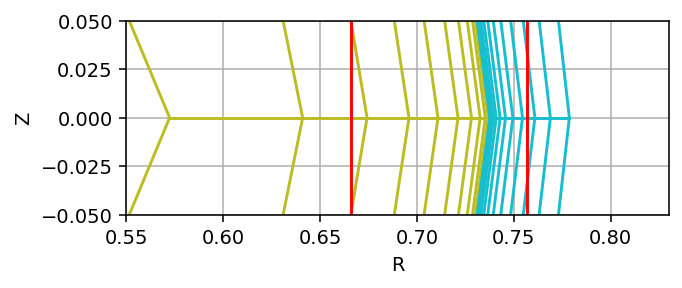

In [57]:
gridname = "g3e3-lores_widev3"
path = os.path.join(onedrive_path, r"Project\collab\tech\grid\ST40\matteo-mod")
path_yaml = os.path.join(path, f"{gridname}.yml")
path_grid = os.path.join(path, f"{gridname}.nc")

with open(path_yaml) as f:
	options = yaml.safe_load(f)

with open(os.path.join(onedrive_path, r"Project\collab\tech\grid\ST40\4-soledge_optimised\ST40_P3_eq_0015_modgeom.geqdsk"), "rt") as fh:
    eq = tokamak.read_geqdsk(fh, settings=options, nonorthogonal_settings=options)
    
mesh = BoutMesh(eq, options)
# mesh.redistributePoints(options)
mesh.calculateRZ()
fig, ax = plt.subplots(figsize = (5,7), dpi = 140)
# eq.plotPotential(ncontours=200, axis = ax, linewidths = 0.5)
eq.plotWall(axis = ax)
ax.plot(*eq.x_points[0], "rx",)
# mesh.plotPoints(xlow=False, ylow=False, corners=False, ax = ax, s = 2)
mesh.plotGridCellEdges(ax = ax)
eq.plotWall(axis = ax)
ax.grid()
ax.legend('', frameon=False)
# ax.set_xlim([0.15, 0.75]); ax.set_ylim([-0.86,-0.1])     # Both lower divertors
# ax.set_xlim([0.20, 0.45]); ax.set_ylim([0.6,0.8])     # Inner upper leg
ax.set_xlim([0.55, 0.83]); ax.set_ylim([-0.05,0.05])     # OMP
# ax.set_xlim([0.12, 0.300]); ax.set_ylim([-0.15,0.05])     # IMP
ax.set_xlabel("R")
ax.set_ylabel("Z")
ax.set_aspect(1)


## PLOT REFERENCE
# mesh2 = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3b2-fatter_newhypno.nc")
# kwargs = dict(s= 10, zorder = 20, c = "k")
# slicer = mesh2.slices("core_edge")
# ax.scatter(mesh2.mesh["Rxy"][slicer].flatten(), mesh2.mesh["Zxy"][slicer].flatten(), label = "Reference", **kwargs)
# slicer = mesh2.slices("sol_edge")
# ax.scatter(mesh2.mesh["Rxy"][slicer].flatten(), mesh2.mesh["Zxy"][slicer].flatten(), **kwargs)
# mesh2.close()

## PLOT SOLEDGE REFERFENCE
# slc.plot_2d(fig, ax, param = "Dense", grid_only = False, linewidth = 1)
ax.vlines([0.666, 0.757], -0.15, 0.20, colors = "r")

plt.savefig(os.path.join(path, gridname + ".png"), dpi = 150)
mesh.geometry()
mesh.writeGridfile(path_grid)
